In [368]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import geopandas as gpd
from geopandas.tools import overlay
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pylab as pl 
import shapely
from fiona.crs import from_epsg
import urllib
from matplotlib.ticker import FuncFormatter

# to Plot matplotlib figures inline on the notebook
%matplotlib inline

# Exploring Art Galleries in Manhattan using Python 

Author: Mark Bauer

Date Created: December 7, 2019

Date Modified: October 13, 2020

# New York City Art Galleries

## Website Link: https://data.cityofnewyork.us/Recreation/New-York-City-Art-Galleries/tgyc-r5jh

![nyc-art-galleries](images/nyc-art-galleries.png)

In [369]:
url = 'https://data.cityofnewyork.us/api/geospatial/tgyc-r5jh?method=export&format=Shapefile'

In [370]:
nyc_art_galleries = gpd.read_file(url)

In [371]:
nyc_art_galleries.head()

,address1,address2,city,name,tel,url,zip,geometry
0,52 E 76th St,None,New York,O'reilly William & Co Ltd,(212) 396-1822,http://www.nyc.com/arts__attractions/oreilly_w...,10021.0,POINT (-73.96273 40.77380)
1,19 Hudson St.,None,New York,Organization of Independent Artists - Gallery 402,(212) 219-9213,http://www.nonprofitgallery.com/main/usa/ny/oi...,10013.0,POINT (-74.00939 40.71647)
2,19 E 75th St,None,New York,Owen Gallery,(212) 879-2415,http://www.owengallery.com/about-us,10021.0,POINT (-73.96435 40.77400)
3,511 W 25th St,None,New York,P P O W Gallerie,(212) 647-1044,http://www.ppowgallery.com/,10001.0,POINT (-74.00389 40.74959)
4,476 Broome St,None,New York,P P O W Inc,(212) 941-8642,http://www.nyc.com/arts__attractions/p_p_o_w_i...,10013.0,POINT (-74.00176 40.72291)


In [372]:
#saving raw data
nyc_art_galleries.to_csv('data/nyc-art-galleries.csv')

In [373]:
nyc_art_galleries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [374]:
nyc_art_galleries = nyc_art_galleries.to_crs(epsg=2263)

(937143.557767464, 1058945.2895900225, 150859.74488560605, 267399.35898438474)

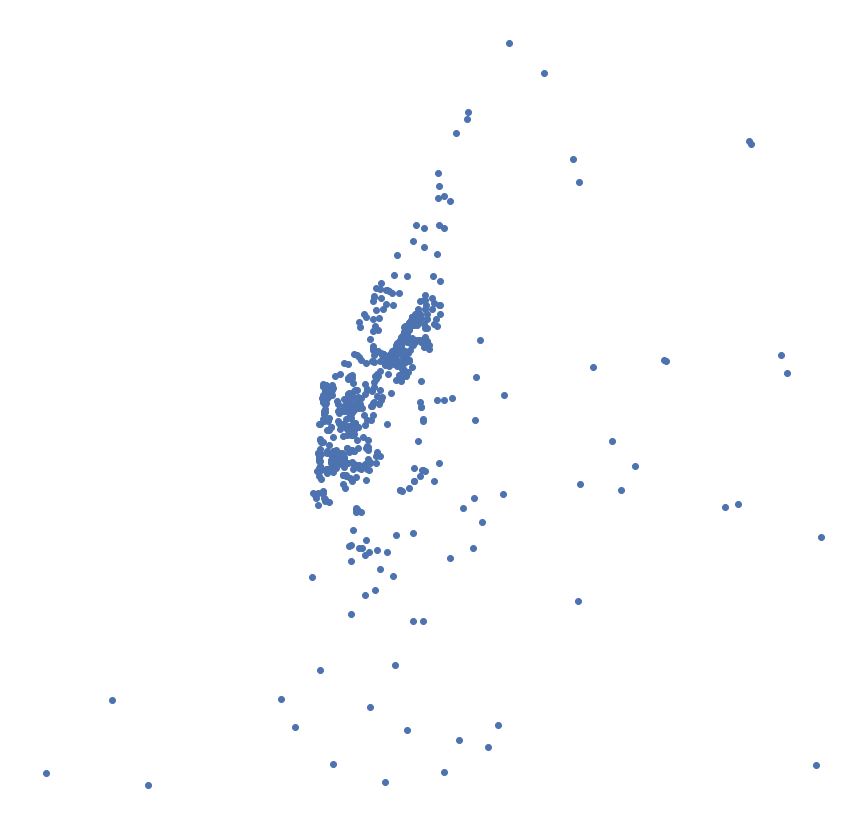

In [375]:
fig, ax = plt.subplots(figsize=(20,15))

nyc_art_galleries.plot(ax=ax, color='b')

# Insert comment here
plt.axis('off')

# Neighborhood Tabulation Areas

## Website Link: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq

![nyc-nta-neighborhoods](images/nyc-nta-neighborhoods.png)

In [376]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'

In [377]:
nta = gpd.read_file(url)

In [378]:
nta.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904872,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712132,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
3,3.0,Brooklyn,047,BK95,Erasmus,1.452260e+07,18756.701865,"POLYGON ((-73.94826 40.63861, -73.94923 40.638..."
4,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335600,"POLYGON ((-73.75726 40.71814, -73.75589 40.716..."


In [379]:
nta.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [380]:
nta = nta.to_crs(epsg=2263)

In [381]:
nta_mn  = nta.loc[nta.boro_name == 'Manhattan']

(969060.880270385, 1012018.2551666244, 184509.04999687575, 263121.04259331967)

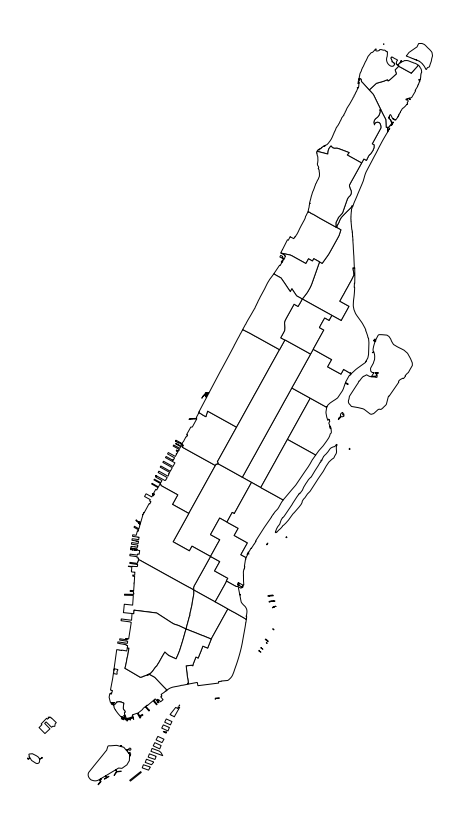

In [382]:
fig, ax = plt.subplots(figsize=(20,15))

nta_mn.plot(ax=ax, color='w', edgecolor='black')

# Insert comment here
plt.axis('off')

In [383]:
nta.dtypes

boro_code      float64
boro_name       object
county_fip      object
ntacode         object
ntaname         object
shape_area     float64
shape_leng     float64
geometry      geometry
dtype: object

# Converting Shape Area (Feet Squared) to Miles Squared

In [384]:
nta.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904872,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712132,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,3.0,Brooklyn,047,BK95,Erasmus,1.452260e+07,18756.701865,"POLYGON ((998608.334 171942.436, 998339.702 17..."
4,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335600,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."


In [385]:
nta_mn['mi_sq'] = nta_mn.shape_area / 5280**2

/Users/geribauer/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [386]:
nta_mn[['ntaname', 'shape_area', 'mi_sq']].head()

,ntaname,shape_area,mi_sq
22,Gramercy,7.526914e+06,0.269991
40,Clinton,1.836215e+07,0.658651
45,Upper East Side-Carnegie Hill,2.006536e+07,0.719746
60,Battery Park City-Lower Manhattan,1.901430e+07,0.682044
61,Lincoln Square,1.580559e+07,0.566947


In [387]:
nta_mn.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [388]:
nyc_art_galleries.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [389]:
nta_galleries = gpd.sjoin(nyc_art_galleries, nta_mn, op='within')

In [390]:
nta_galleries.head()

,address1,address2,city,name,tel,url,zip,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,mi_sq
0,52 E 76th St,None,New York,O'reilly William & Co Ltd,(212) 396-1822,http://www.nyc.com/arts__attractions/oreilly_w...,10021.0,POINT (994572.610 221195.522),45,1.0,Manhattan,061,MN40,Upper East Side-Carnegie Hill,2.006536e+07,23778.410362,0.719746
2,19 E 75th St,None,New York,Owen Gallery,(212) 879-2415,http://www.owengallery.com/about-us,10021.0,POINT (994123.595 221268.195),45,1.0,Manhattan,061,MN40,Upper East Side-Carnegie Hill,2.006536e+07,23778.410362,0.719746
15,188 E 64th St,None,New York,Pall William Inc,(212) 758-3340,http://local.botw.org/New_York/New_York/Pall_W...,10021.0,POINT (993997.423 217809.851),45,1.0,Manhattan,061,MN40,Upper East Side-Carnegie Hill,2.006536e+07,23778.410362,0.719746
16,40 E 94th St,None,New York,Palmer Meredith Gallery,(212) 828-9100,http://www.artinfo.com/galleryguide/12649/1149...,10128.0,POINT (996760.766 225507.548),45,1.0,Manhattan,061,MN40,Upper East Side-Carnegie Hill,2.006536e+07,23778.410362,0.719746
25,980 Madison Ave,None,New York,Peck Ian Fine Paintings Ltd,(212) 396-2442,http://gallerydriver.com/?method=Gallery.Galle...,10021.0,POINT (994317.820 221545.051),45,1.0,Manhattan,061,MN40,Upper East Side-Carnegie Hill,2.006536e+07,23778.410362,0.719746


In [391]:
nta_galleries.shape

(823, 17)

In [392]:
nta_galleries.boro_name.unique()

array(['Manhattan'], dtype=object)

In [393]:
nta_galleries = nta_galleries.groupby('ntaname').count()

In [394]:
nta_galleries.head()

,address1,address2,city,name,tel,url,zip,geometry,index_right,boro_code,boro_name,county_fip,ntacode,shape_area,shape_leng,mi_sq
ntaname,,,,,,,,,,,,,,,,
Battery Park City-Lower Manhattan,13,2,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Central Harlem North-Polo Grounds,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Central Harlem South,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Chinatown,17,0,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Clinton,10,1,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [395]:
nta_galleries.reset_index(inplace=True)

In [396]:
nta_galleries.head()

,ntaname,address1,address2,city,name,tel,url,zip,geometry,index_right,boro_code,boro_name,county_fip,ntacode,shape_area,shape_leng,mi_sq
0,Battery Park City-Lower Manhattan,13,2,13,13,13,13,13,13,13,13,13,13,13,13,13,13
1,Central Harlem North-Polo Grounds,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,Central Harlem South,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,Chinatown,17,0,17,17,17,17,17,17,17,17,17,17,17,17,17,17
4,Clinton,10,1,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [397]:
# selecting only important columns
nta_galleries = nta_galleries[['ntaname','name']]

In [398]:
nta_galleries.head()

,ntaname,name
0,Battery Park City-Lower Manhattan,13
1,Central Harlem North-Polo Grounds,3
2,Central Harlem South,2
3,Chinatown,17
4,Clinton,10


In [399]:
nta_galleries.rename(columns={"name": "numofgalleries"}, inplace=True)

In [400]:
nta_galleries.head()

,ntaname,numofgalleries
0,Battery Park City-Lower Manhattan,13
1,Central Harlem North-Polo Grounds,3
2,Central Harlem South,2
3,Chinatown,17
4,Clinton,10


In [401]:
nta_galleries.shape

(25, 2)

In [402]:
nta_galleries.dtypes

ntaname           object
numofgalleries     int64
dtype: object

In [403]:
nta_galleries = nta_mn.merge(nta_galleries, left_on="ntaname", 
              right_on="ntaname")

In [404]:
nta_galleries.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,mi_sq,numofgalleries
0,1.0,Manhattan,061,MN21,Gramercy,7.526914e+06,12096.891174,"POLYGON ((990196.892 207745.371, 990187.613 20...",0.269991,6
1,1.0,Manhattan,061,MN15,Clinton,1.836215e+07,34481.628773,"POLYGON ((985958.652 220876.750, 985970.759 22...",0.658651,10
2,1.0,Manhattan,061,MN40,Upper East Side-Carnegie Hill,2.006536e+07,23778.410362,"POLYGON ((998281.392 225347.967, 998145.231 22...",0.719746,153
3,1.0,Manhattan,061,MN25,Battery Park City-Lower Manhattan,1.901430e+07,43738.496041,"MULTIPOLYGON (((984032.884 192223.748, 983984....",0.682044,13
4,1.0,Manhattan,061,MN14,Lincoln Square,1.580559e+07,19869.908314,"POLYGON ((991173.649 222552.152, 991046.810 22...",0.566947,10


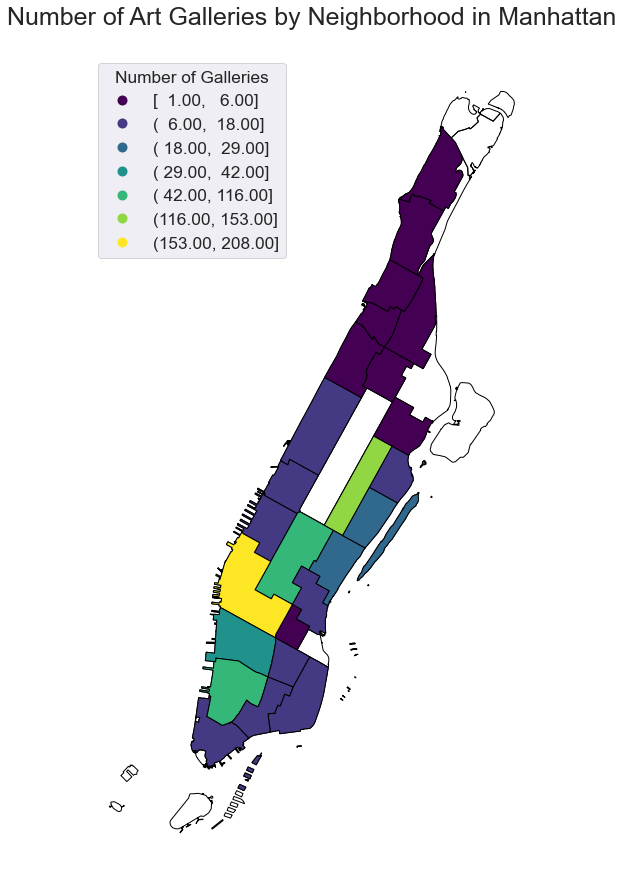

In [405]:
# defining our plot
plt.subplots(figsize=(20,15))
ax = plt.subplot()

nta_mn.plot(ax=ax, color='None', edgecolor='black')

nta_galleries.plot(column="numofgalleries", 
                   ax=ax, 
                   k=7, 
                   scheme='fisher_jenks', 
                   label=True, 
                   legend=True, 
                   legend_kwds={'loc': 'upper left', 'title': 'Number of Galleries', 
                   'title_fontsize': 'xx-large','fontsize': 'xx-large'}, 
                   cmap='viridis', 
                   edgecolor='black')

ax.set_title("Number of Art Galleries by Neighborhood in Manhattan", fontsize=25, pad=30)

plt.axis('off')

# saving figure
plt.savefig('figures/galleries-by-neighborhood-manhattan-map.png')

In [406]:
nta_galleries.sort_values(by='numofgalleries', ascending=False).head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,mi_sq,numofgalleries
8,1.0,Manhattan,061,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3.706838e+07,45693.074601,"POLYGON ((983825.303 217128.729, 983879.487 21...",1.329645,208
2,1.0,Manhattan,061,MN40,Upper East Side-Carnegie Hill,2.006536e+07,23778.410362,"POLYGON ((998281.392 225347.967, 998145.231 22...",0.719746,153
19,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031669,"POLYGON ((986300.242 203099.066, 986292.116 20...",0.897924,116
5,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700221,"POLYGON ((991725.244 217725.299, 992169.505 21...",1.082972,107
9,1.0,Manhattan,061,MN23,West Village,2.497065e+07,28621.651152,"POLYGON ((987048.269 206851.147, 987057.852 20...",0.895699,42


In [407]:
nta_galleries.sort_values(by='numofgalleries', 
                          ascending=False)[['ntaname', 
                                            'numofgalleries']].head(10)

,ntaname,numofgalleries
8,Hudson Yards-Chelsea-Flatiron-Union Square,208
2,Upper East Side-Carnegie Hill,153
19,SoHo-TriBeCa-Civic Center-Little Italy,116
5,Midtown-Midtown South,107
9,West Village,42
24,Lenox Hill-Roosevelt Island,29
23,Turtle Bay-East Midtown,28
10,Upper West Side,18
20,Chinatown,17
16,Murray Hill-Kips Bay,14


In [408]:
nta_galleries.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,mi_sq,numofgalleries
0,1.0,Manhattan,061,MN21,Gramercy,7.526914e+06,12096.891174,"POLYGON ((990196.892 207745.371, 990187.613 20...",0.269991,6
1,1.0,Manhattan,061,MN15,Clinton,1.836215e+07,34481.628773,"POLYGON ((985958.652 220876.750, 985970.759 22...",0.658651,10
2,1.0,Manhattan,061,MN40,Upper East Side-Carnegie Hill,2.006536e+07,23778.410362,"POLYGON ((998281.392 225347.967, 998145.231 22...",0.719746,153
3,1.0,Manhattan,061,MN25,Battery Park City-Lower Manhattan,1.901430e+07,43738.496041,"MULTIPOLYGON (((984032.884 192223.748, 983984....",0.682044,13
4,1.0,Manhattan,061,MN14,Lincoln Square,1.580559e+07,19869.908314,"POLYGON ((991173.649 222552.152, 991046.810 22...",0.566947,10


In [409]:
nta_galleries['numofgalleries_per_mi_sq'] = nta_galleries['numofgalleries'] / nta_galleries['mi_sq']

In [410]:
nta_galleries.sort_values(by='numofgalleries_per_mi_sq', ascending=False)[['ntaname', 'numofgalleries', 'numofgalleries_per_mi_sq']].head(10)

,ntaname,numofgalleries,numofgalleries_per_mi_sq
2,Upper East Side-Carnegie Hill,153,212.575019
8,Hudson Yards-Chelsea-Flatiron-Union Square,208,156.432704
19,SoHo-TriBeCa-Civic Center-Little Italy,116,129.186894
5,Midtown-Midtown South,107,98.802160
9,West Village,42,46.890761
23,Turtle Bay-East Midtown,28,44.889748
24,Lenox Hill-Roosevelt Island,29,37.588361
20,Chinatown,17,32.680796
14,East Village,11,28.149034
16,Murray Hill-Kips Bay,14,26.943323


In [411]:
nta_galleries.sort_values(by='numofgalleries_per_mi_sq', ascending=False)[['ntaname', 'numofgalleries', 'numofgalleries_per_mi_sq']].head(10)

,ntaname,numofgalleries,numofgalleries_per_mi_sq
2,Upper East Side-Carnegie Hill,153,212.575019
8,Hudson Yards-Chelsea-Flatiron-Union Square,208,156.432704
19,SoHo-TriBeCa-Civic Center-Little Italy,116,129.186894
5,Midtown-Midtown South,107,98.802160
9,West Village,42,46.890761
23,Turtle Bay-East Midtown,28,44.889748
24,Lenox Hill-Roosevelt Island,29,37.588361
20,Chinatown,17,32.680796
14,East Village,11,28.149034
16,Murray Hill-Kips Bay,14,26.943323


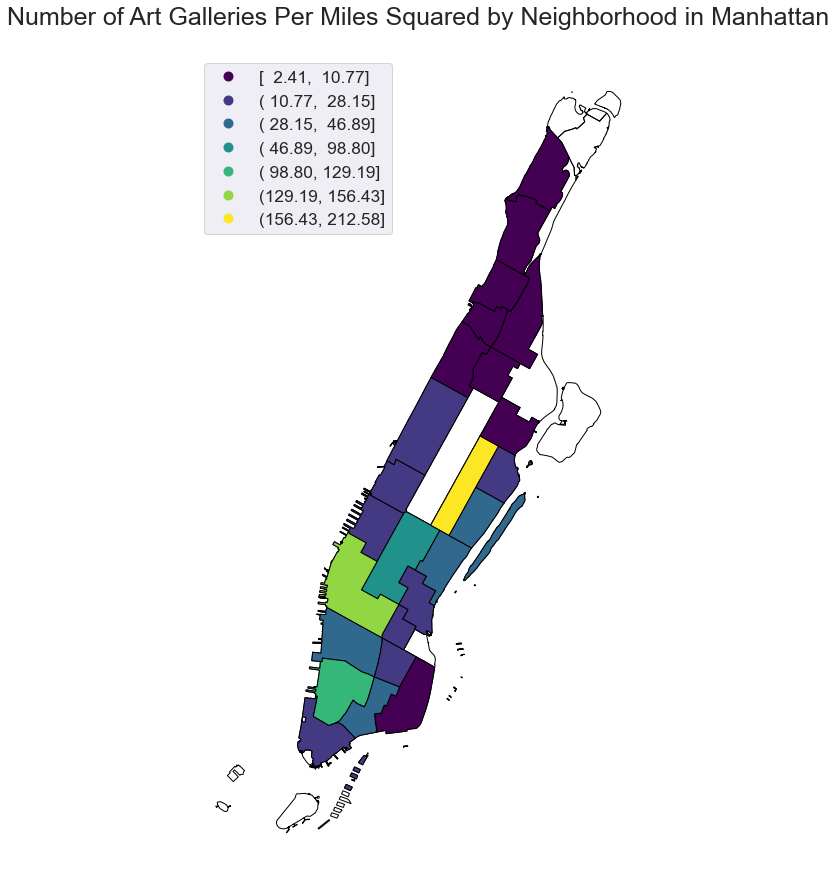

In [412]:
# defining our plot
plt.subplots(figsize=(20,15))
ax = plt.subplot()

nta_mn.plot(ax=ax, color='None', edgecolor='black')

nta_galleries.plot(column="numofgalleries_per_mi_sq", 
                   ax=ax, 
                   k=7, 
                   scheme='fisher_jenks', 
                   label=True, 
                   legend=True, 
                   legend_kwds={'loc': 'upper left', 'fontsize': 'xx-large'}, 
                   cmap='viridis', 
                   edgecolor='black')

ax.set_title("Number of Art Galleries Per Miles Squared by Neighborhood in Manhattan", fontsize=25, pad=30)
plt.axis('off')

# saving figure
plt.savefig('figures/galleries-per-mi-sq-by-neighborhood-manhattan-map.png')

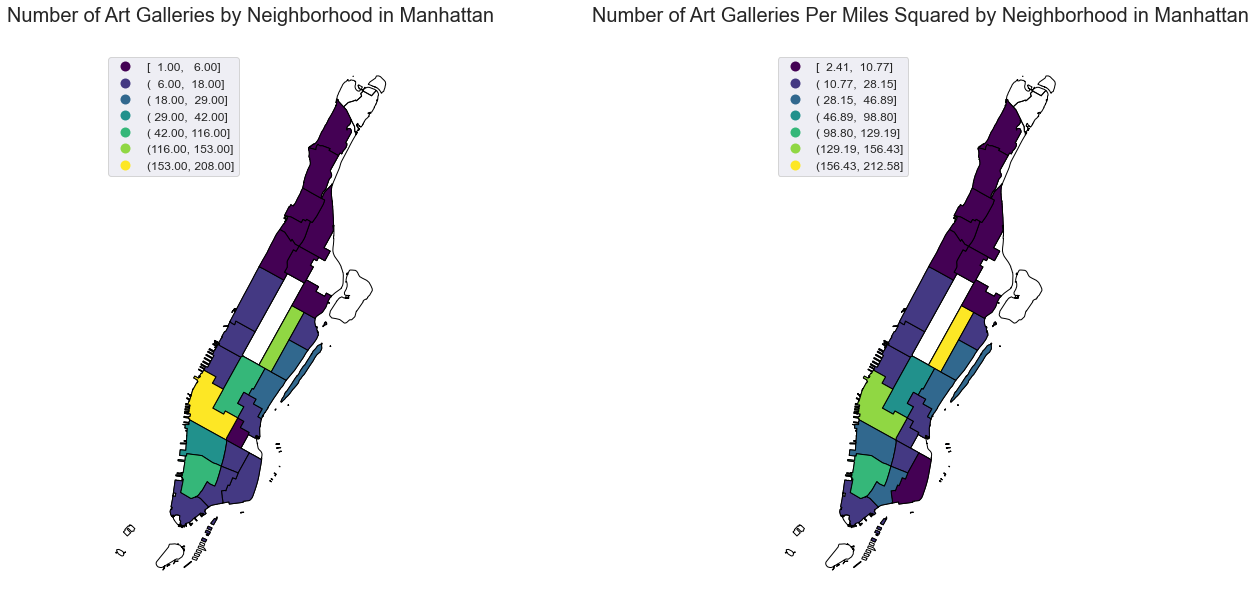

In [413]:
# defining our plot
sns.set(font_scale=1)
fig = pl.figure(figsize=(22,10))

# adding first subplot
ax = fig.add_subplot(121)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

nta_mn.plot(ax=ax, color='None', edgecolor='black')

nta_galleries.plot(column="numofgalleries", 
                   ax=ax, k=7, 
                   scheme='fisher_jenks', 
                   label=True, 
                   legend=True, 
                   legend_kwds={'loc': 'upper left','fontsize': 'medium'}, 
                   cmap='viridis', 
                   edgecolor='black')

ax.set_title("Number of Art Galleries by Neighborhood in Manhattan", fontsize=20, pad=30)
plt.axis('off')

# adding second subplot
ax = fig.add_subplot(122)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

nta_mn.plot(ax=ax, color='None', edgecolor='black')

nta_galleries.plot(column="numofgalleries_per_mi_sq", ax=ax, k=7, 
                   scheme='fisher_jenks', label=True, legend=True, 
                   legend_kwds={'loc': 'upper left', 'fontsize': 'medium'}, 
                   cmap='viridis', edgecolor='black')

ax.set_title("Number of Art Galleries Per Miles Squared by Neighborhood in Manhattan", fontsize=20, pad=30)
plt.axis('off')

# saving figure
plt.savefig('figures/count-and-mi-sq-by-neighborhood-manhattan-maps.png')

In [414]:
nta_galleries.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,mi_sq,numofgalleries,numofgalleries_per_mi_sq
0,1.0,Manhattan,061,MN21,Gramercy,7.526914e+06,12096.891174,"POLYGON ((990196.892 207745.371, 990187.613 20...",0.269991,6,22.222972
1,1.0,Manhattan,061,MN15,Clinton,1.836215e+07,34481.628773,"POLYGON ((985958.652 220876.750, 985970.759 22...",0.658651,10,15.182536
2,1.0,Manhattan,061,MN40,Upper East Side-Carnegie Hill,2.006536e+07,23778.410362,"POLYGON ((998281.392 225347.967, 998145.231 22...",0.719746,153,212.575019
3,1.0,Manhattan,061,MN25,Battery Park City-Lower Manhattan,1.901430e+07,43738.496041,"MULTIPOLYGON (((984032.884 192223.748, 983984....",0.682044,13,19.060351
4,1.0,Manhattan,061,MN14,Lincoln Square,1.580559e+07,19869.908314,"POLYGON ((991173.649 222552.152, 991046.810 22...",0.566947,10,17.638321


In [415]:
nta_galleries_df = pd.DataFrame(nta_galleries)

In [416]:
nta_galleries_df.sort_values(by='numofgalleries', ascending=False).head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,mi_sq,numofgalleries,numofgalleries_per_mi_sq
8,1.0,Manhattan,061,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3.706838e+07,45693.074601,"POLYGON ((983825.303 217128.729, 983879.487 21...",1.329645,208,156.432704
2,1.0,Manhattan,061,MN40,Upper East Side-Carnegie Hill,2.006536e+07,23778.410362,"POLYGON ((998281.392 225347.967, 998145.231 22...",0.719746,153,212.575019
19,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031669,"POLYGON ((986300.242 203099.066, 986292.116 20...",0.897924,116,129.186894
5,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700221,"POLYGON ((991725.244 217725.299, 992169.505 21...",1.082972,107,98.802160
9,1.0,Manhattan,061,MN23,West Village,2.497065e+07,28621.651152,"POLYGON ((987048.269 206851.147, 987057.852 20...",0.895699,42,46.890761


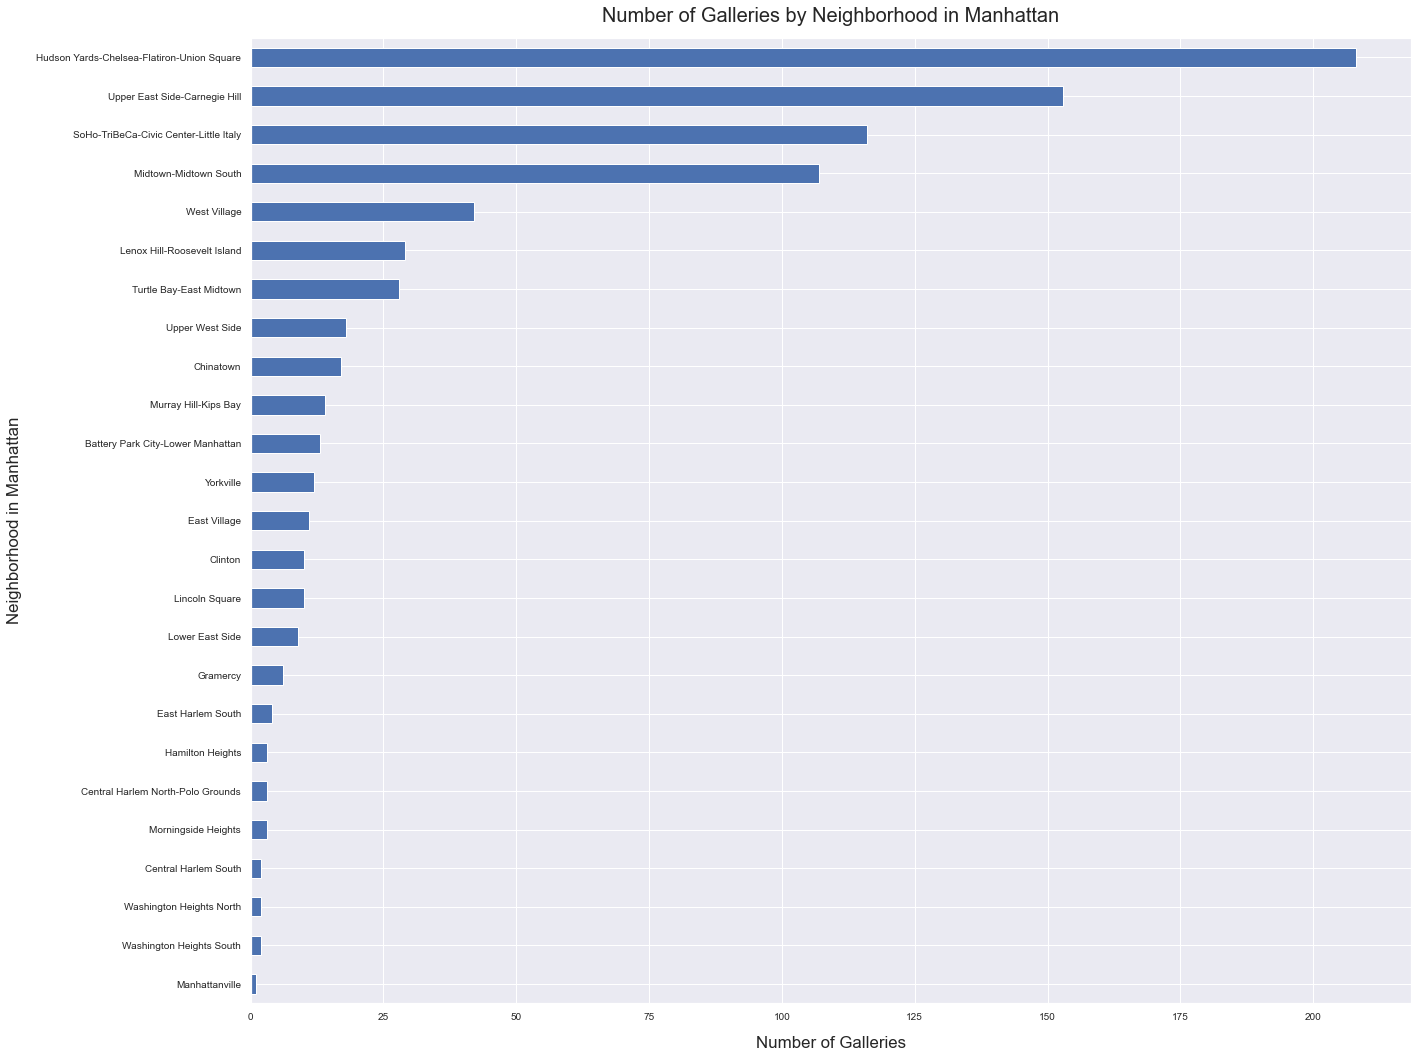

In [417]:
# defining our plot
sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
ax = plt.subplot()

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

nta_galleries_df.sort_values('numofgalleries', ascending=True).plot.barh(x='ntaname', 
                                                        y='numofgalleries', 
                                                        ax=ax, color='b', 
                                                        fontsize=10, 
                                                        legend=False)
plt.xlabel("Number of Galleries", labelpad=14)
plt.ylabel("Neighborhood in Manhattan", labelpad=14)
plt.title("Number of Galleries by Neighborhood in Manhattan", pad=16, fontsize=20)
plt.tight_layout()

# saving figure
plt.savefig('figures/galleries-by-neighborhood-manhattan-bar.png')

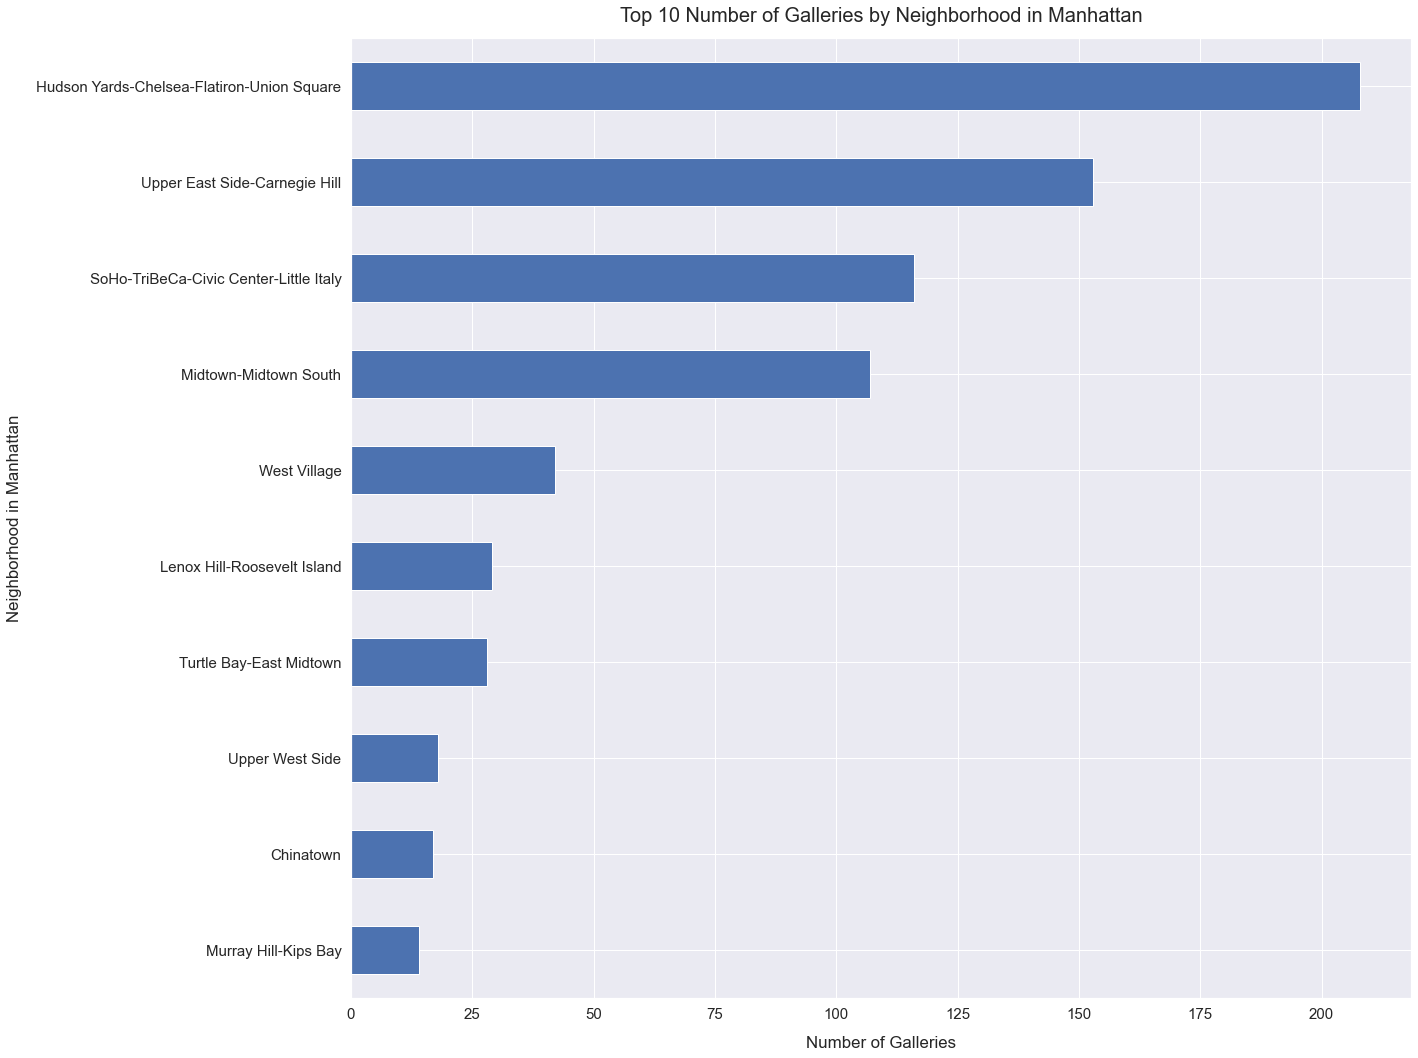

In [418]:
# defining our plot
sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
ax = plt.subplot()

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

df = nta_galleries_df.sort_values('numofgalleries', ascending=False).head(10)

df.sort_values(by='numofgalleries', 
               ascending=True).plot.barh(x='ntaname', 
                                         y='numofgalleries', 
                                         ax=ax, 
                                         color='b', 
                                         fontsize=15, 
                                         legend=False)

plt.xlabel("Number of Galleries", labelpad=14)
plt.ylabel("Neighborhood in Manhattan", labelpad=14)
plt.title("Top 10 Number of Galleries by Neighborhood in Manhattan", pad=16, fontsize=20)
plt.tight_layout()

# saving figure
plt.savefig('figures/galleries-by-neighborhood-manhattan-bar-top10.png')

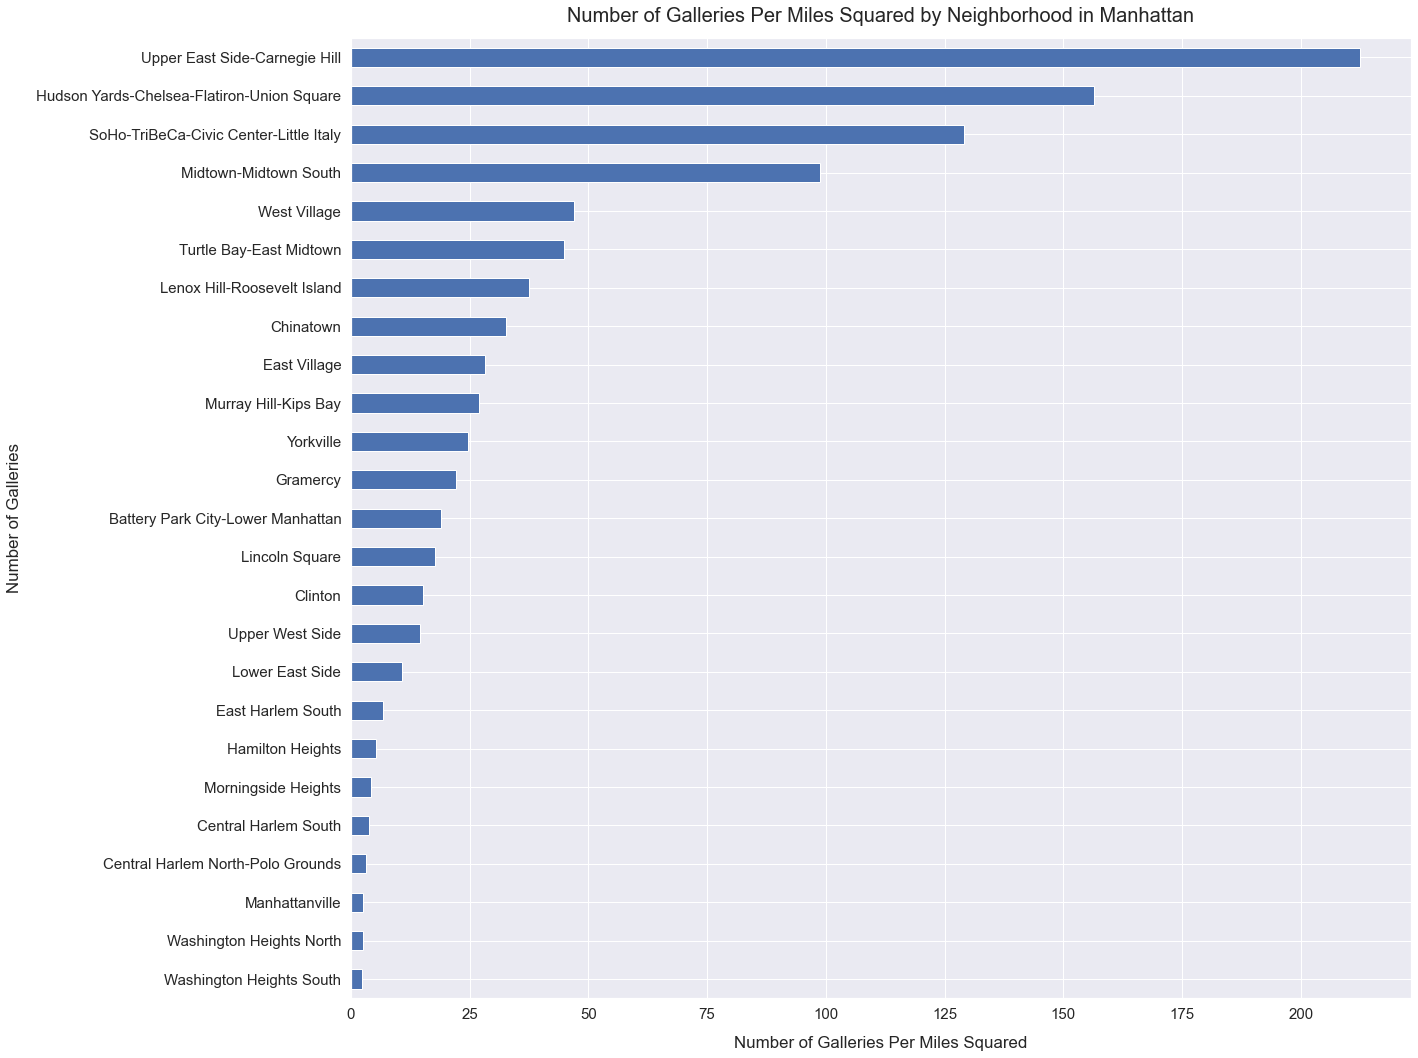

In [419]:
# defining our plot
sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
ax = plt.subplot()

nta_galleries_df.sort_values('numofgalleries_per_mi_sq').plot.barh(x='ntaname', 
                                                                   y='numofgalleries_per_mi_sq', 
                                                                   ax=ax, 
                                                                   color='b', 
                                                                   fontsize=15, 
                                                                   legend=False)

plt.xlabel("Number of Galleries Per Miles Squared", labelpad=14)
plt.ylabel("Number of Galleries", labelpad=14)
plt.title("Number of Galleries Per Miles Squared by Neighborhood in Manhattan", pad=16, fontsize=20)
plt.tight_layout()

# saving figure
plt.savefig('figures/galleries-per-mi-sq-by-neighborhood-manhattan-bar.png')

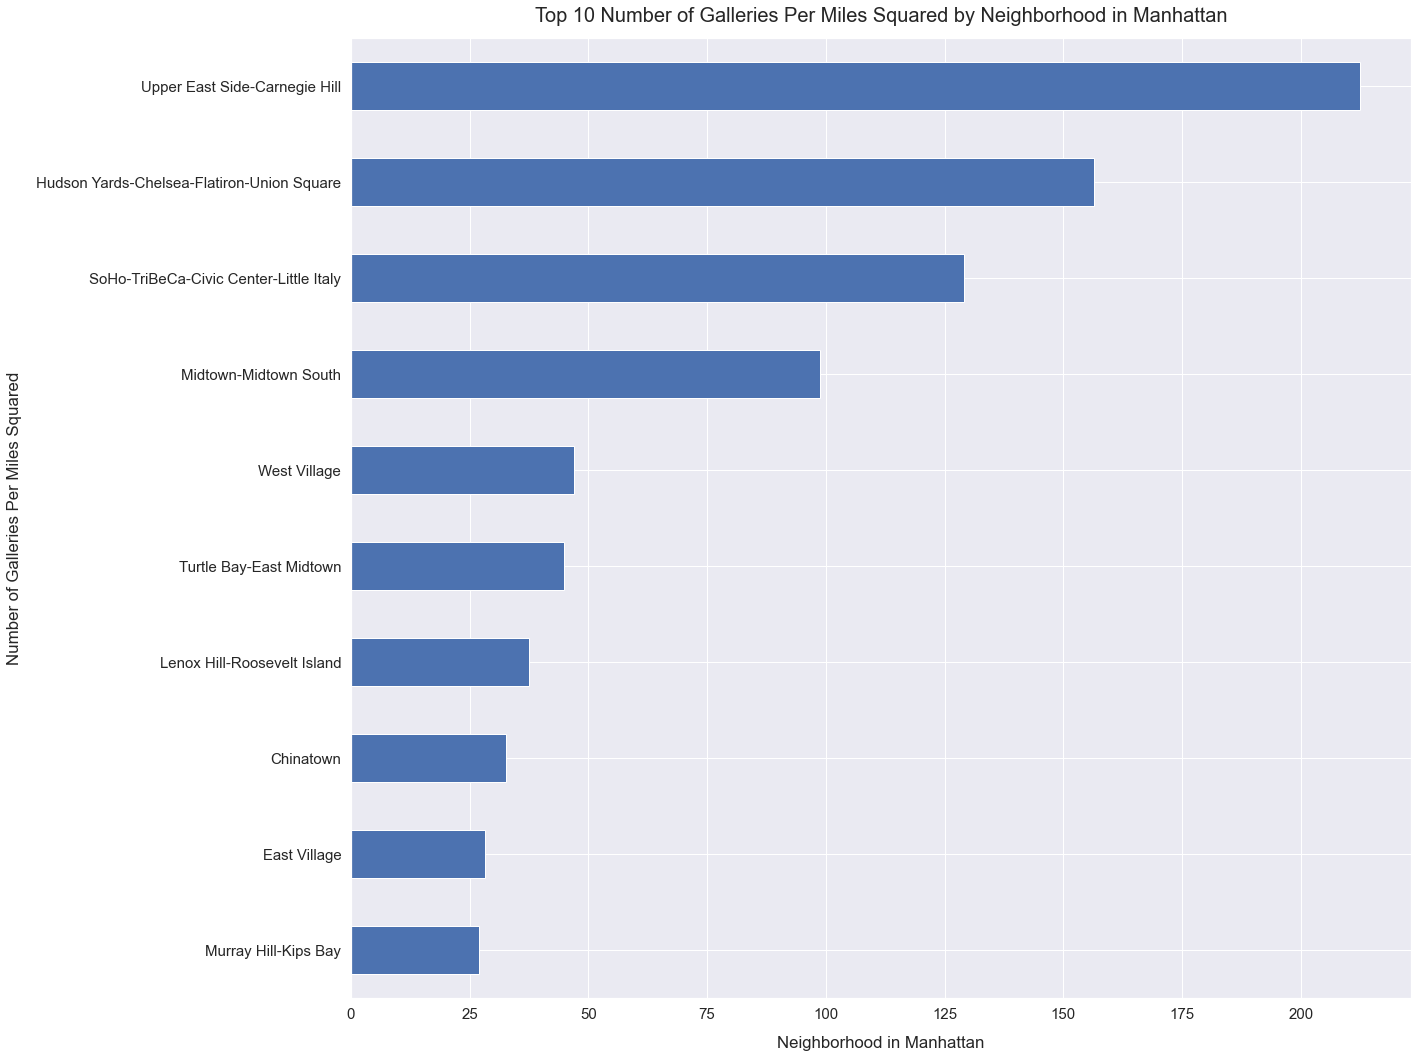

In [420]:
# defining our plot
sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
ax = plt.subplot()

df = nta_galleries_df.sort_values('numofgalleries_per_mi_sq', ascending=False).head(10)

df.sort_values(by='numofgalleries_per_mi_sq', 
               ascending=True).plot.barh(x='ntaname', 
                                         y='numofgalleries_per_mi_sq', 
                                         ax=ax, 
                                         color='b', 
                                         fontsize=15, 
                                         legend=False)

plt.xlabel("Neighborhood in Manhattan", labelpad=14)
plt.ylabel("Number of Galleries Per Miles Squared", labelpad=14)
plt.title("Top 10 Number of Galleries Per Miles Squared by Neighborhood in Manhattan", pad=16, fontsize=20)
plt.tight_layout()

# saving figure
plt.savefig('figures/galleries-per-mi-sq-by-neighborhood-manhattan-bar-top10.png')